In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import os
import seaborn as sns


### Calculating the sample size for 25% group

In [6]:
ME = 0.2
dataQuartInitial10 = pd.read_csv('modelgroups/qstd10/allMAE.csv')
std = dataQuartInitial10['Testing MAE after 100 epochs'].std(ddof=1)
mean = dataQuartInitial10['Testing MAE after 100 epochs'].mean()
print('mean MAE after 100 epochs is ',mean)
print('std for MAE after 100 epochs is ',std)
print('Required sample size ',(1.96 * std / ME )**2)

mean MAE after 100 epochs is  14.92492208480835
std for MAE after 100 epochs is  0.8068039302334183
Required sample size  62.51556515992229


### Calculation the sample size for 50% group

In [8]:
dataHalfInitial10 = pd.read_csv('modelgroups/hstd10/allMAE.csv')
std = dataHalfInitial10['Testing MAE after 100 epochs'].std(ddof=1)
mean = dataHalfInitial10['Testing MAE after 100 epochs'].mean()
print('mean MAE after 100 epochs is ',mean)
print('std for MAE after 100 epochs is ',std)
print('Required sample size ',(1.96 * std / ME )**2)

mean MAE after 100 epochs is  12.263525295257569
std for MAE after 100 epochs is  0.40135412342800286
Required sample size  15.470616114991119


### Calculation the sample size for 100% group

In [9]:
dataAllInitial10 = pd.read_csv('modelgroups/astd10/allMAE.csv')
std = dataAllInitial10['Testing MAE after 100 epochs'].std(ddof=1)
mean = dataAllInitial10['Testing MAE after 100 epochs'].mean()
print('mean MAE after 100 epochs is ',mean)
print('std for MAE after 100 epochs is ',std)
print('Required sample size ',(1.96 * std / ME )**2)

mean MAE after 100 epochs is  10.02003288269043
std for MAE after 100 epochs is  0.46858554297579114
Required sample size  21.087734360691464


### Fetching data for all groups

In [10]:
dataQuart = pd.read_csv('./modelGroups/quartGroup/allMAE.csv')
maeQuart = dataQuart['Testing MAE after 100 epochs']
dataHalf = pd.read_csv('./modelGroups/halfGroup/allMAE.csv')
maeHalf = dataHalf['Testing MAE after 100 epochs']
dataAll = pd.read_csv('./modelGroups/allGroup/allMAE.csv')
maeAll = dataAll['Testing MAE after 100 epochs']

### Function definition for calculation CI

In [40]:
def CalculateCI(mean, std, alpha, n):
    t = stats.t.ppf(1 - alpha/2, df = n - 1)
    return mean + np.array([-1, 1]) * t * std/np.sqrt(n)

### Calculating the confidence intervals for all groups

In [42]:
print('***quart group***')
print('mean: ',maeQuart.mean())
print('standard deviation: ',maeQuart.std(ddof=1))
print('Confidence interval is ', CalculateCI(maeQuart.mean(), maeQuart.std(ddof=1), 0.05, 63))
print()
print('***half group***')
print('mean: ',maeHalf.mean())
print('standard deviation: ',maeHalf.std(ddof=1))
print('Confidence interval is ', CalculateCI(maeHalf.mean(), maeHalf.std(ddof=1), 0.05, 15))
print()
print('***all group***')
print('mean: ',maeAll.mean())
print('standard deviation: ',maeAll.std(ddof=1))
print('Confidence interval is ', CalculateCI(maeAll.mean(), maeAll.std(ddof=1), 0.05, 21))


***quart group***
mean:  15.191846272302053
standard deviation:  0.9987393050665838
Confidence interval is  [14.94031704 15.44337551]

***half group***
mean:  12.002617454528808
standard deviation:  0.5026802686269399
Confidence interval is  [11.7242424  12.28099251]

***all group***
mean:  9.938417616344633
standard deviation:  0.37705245691630035
Confidence interval is  [ 9.7667854  10.11004984]


### Gathering all the data for plotting

In [91]:

groupNames = ['quartGroup','halfGroup','allGroup']

dataTemplate = {


}

allModelsData = pd.DataFrame(dataTemplate)

for groupName in groupNames:
    numOfModels = (
        len(
            [
                name
                for name in os.listdir(
                    f"C:/Users/Ali/Desktop/UNI/AI/3UGERS/IKIT-3-ugers/modelgroups/{groupName}"
                )
            ]
        )
        - 1
    )
    print(numOfModels)
    for i in range(1, numOfModels + 1):
        
        model_data = pd.read_csv(
            "./modelgroups/" + groupName + "/MODEL-" + groupName + "-NUMBER-" + str(i)+'/mae_per_epoch.csv'
        )
        model_data['modelName'] = [groupName]*len(model_data)
        model_data = model_data[['Epoch','Testing MAE', 'modelName']]
        allModelsData = pd.concat([allModelsData, model_data], ignore_index=True, axis = 0)
        
        # Taken from https://www.geeksforgeeks.org/how-to-stack-multiple-pandas-dataframes/ 
        # allModelsData = pd.concat([allModelsData,model_data], ignore_index=True, axis=1)
        # print(allModelsData)
print(allModelsData)

63
15
21
      Epoch  Testing MAE   modelName
0         1    30.269077  quartGroup
1         2    28.525400  quartGroup
2         3    24.264412  quartGroup
3         4    20.328196  quartGroup
4         5    19.824499  quartGroup
...     ...          ...         ...
9895     96     9.504598    allGroup
9896     97     9.504580    allGroup
9897     98     9.504577    allGroup
9898     99     9.504542    allGroup
9899    100     9.504545    allGroup

[9900 rows x 3 columns]


### Plotting the progression of the MAE through each epoch using the Seaborn library

Text(0, 0.5, 'MAE')

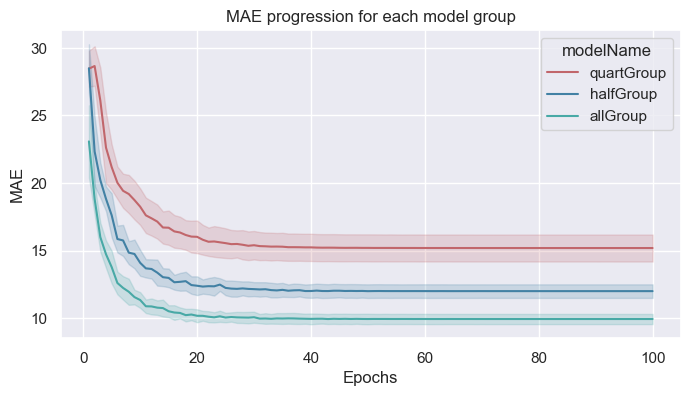

In [100]:

df = allModelsData

#taken from https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn-lineplot 
sns.set_theme(style="darkgrid", palette=None)
plt.figure(figsize=(8, 4))

sns.lineplot(data=df, x="Epoch", y="Testing MAE", hue="modelName", palette=[ (0.7569,0.4,0.4196),(0.2588,0.5059,0.6431),(0.2824,0.6627,0.651)] ,errorbar="sd", markers=True)


plt.title("MAE progression for each model group")
plt.xlabel("Epochs")
plt.ylabel("MAE")


# plt.show()